In [1]:
%%html
<style>
@import url('https://fonts.googleapis.com/css?family=Roboto&effect=3d|brick-sign|');
span {font-family:Roboto; color:black; text-shadow:4px 4px 4px #aaa;}  
h1,h2 {font-family:Roboto; color:slategray; text-shadow:4px 4px 4px #aaa;} 
div.output_subarea, div.output_area pre{font-family:Roboto; font_size:120%; color:darkblue;}
</style> 

In [2]:
import math, sympy, numpy
sympy.init_printing(use_unicode=True)
from sympy import *
from mpmath import *
from sympy.physics.vector import *

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection

import pylab as plt
import matplotlib
%matplotlib inline

[Computer Algebra I: Mathematica, SymPy, Sage, Maxima](http://hyperpolyglot.org/computer-algebra2)

[LaTeX/Mathematics](https://en.wikibooks.org/wiki/LaTeX/Mathematics)

[МЦНМО. Свободно распространяемые издания](https://www.mccme.ru/free-books/)

# Типовой расчет 16 / Standard Calculation 16

## Постановка  задачи / Formulation of the problem:

Дана матрица $A$ линейного оператора  в базисе $\{e_1, \ e_2, \ e_3\}$.

Найти матрицу этого оператора  в базисе $\{f_1, \ f_2, \ f_3\}$, если 

$\begin{cases}
f_1 = c_{11} e_1+ c_{12} e_2 + c_{13} e_3 \\
f_2 = c_{21} e_1+ c_{22} e_2 + c_{23} e_3 \\
f_3 = c_{31} e_1+ c_{32} e_2 + c_{33} e_3 
\end{cases}$.

МАТРИЦА ОПЕРАТОРА

$A = \begin{pmatrix}
-3 & -4 & -1 \\
4 & -3 & -3 \\
-3 & 2 & -6
\end{pmatrix}$

НОВЫЙ БАЗИС

$\begin{cases}
f_1 = e_1+ e_2 + e_3 \\
f_2 = 2 e_1+ 3 e_2 + 4 e_3 \\
f_3 = 3 e_1+ 5 e_2 + 8 e_3 
\end{cases}$.

## Решение / Decision

# Типовой расчет 17 / Standard Calculation 17

## Постановка  задачи / Formulation of the problem:

Линейный оператор переводит векторы $\mathfrak{e_1, \ e_2, \ e_3}$ в векторы $\mathfrak{f_1, \ f_2, \ f_3}$.

Найти в какой вектор $\mathfrak{f}$ оператор переводит данный вектор $\mathfrak{e}$.

$\mathfrak{e_1} = (3; -2; 2) \to \mathfrak{f_1} = (4; -3; 3)\\ 
\mathfrak{e_2} = (-2; -3; -3) \to \mathfrak{f_2} = (4; 3; -1)\\ 
\mathfrak{e_3} = (2; 3; -3) \to \mathfrak{f_3} = (1; 1; 2)$

$\mathfrak{e} = (-4; 7; 11)$

## Решение / Decision

# Типовой расчет 18 / Standard Calculation 18

## Постановка  задачи / Formulation of the problem:

Найти собственные значения и собственные векторы линейного оператора,

заданного в некотором базисе данной матрицей, при условии,

что модуль одного из собственных значений равен 1.

$A = \begin{pmatrix}
-4 & -3 & -5 \\
5 & 4 & 5 \\
-7 & -7 & -6
\end{pmatrix}$

## Решение / Decision

1) Обозначим неизвестный собственный вектор матрицы $A: \overline{u} = (x, y, z)$,

а соответствующее ему собственное значение - $\lambda$.

В данном случае выполняется следующее равенство: 

$A \overline{u} = \lambda \overline{u} \iff 
\begin{pmatrix} -4 & -3 & -5 \\ 5 & 4 & 5 \\ -7 & -7 & -6 \end{pmatrix} * \begin{pmatrix} x \\ y \\ z \end{pmatrix} = \begin{pmatrix} \lambda x \\ \lambda y \\ \lambda z \end{pmatrix} \iff $

$\iff \begin{pmatrix} -4 - \lambda & -3 & -5 \\ 5 & 4 - \lambda & 5 \\ -7 & -7 & -6 - \lambda \end{pmatrix} * \begin{pmatrix} x \\ y \\ z \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 0 \end{pmatrix} $ 

По определению,  собственный вектор $\overline{u} = (x, y, z) \neq (0, 0, 0) \implies$ 

$\iff \begin{vmatrix} -4 - \lambda & -3 & -5 \\ 5 & 4 - \lambda & 5 \\ -7 & -7 & -6 - \lambda \end{vmatrix} = 0$ 

Ко 1-й строке прибавим 2-ую:

$\begin{vmatrix} 1 - \lambda & 1 - \lambda & 0 \\ 5 & 4 - \lambda & 5 \\ -7 & -7 & -6 - \lambda \end{vmatrix} = 0$ 

Из 2-ого столбца вычтем 1-ый:

$\begin{vmatrix} 1 - \lambda & 0 & 0 \\ 5 & -1 - \lambda & 5 \\ -7 & 0 & -6 - \lambda \end{vmatrix} = 0$ 

Раскроем определитель по 2-му столбцу:

$( -1 - \lambda) \begin{vmatrix} 1 - \lambda & 0 \\  -7 & -6 - \lambda \end{vmatrix} = 0$

$( -1 - \lambda) * (1 - \lambda) * (-6 - \lambda) = 0$

$(\lambda + 1) * (\lambda - 1) * (\lambda + 6) = 0$

$\lambda_1 = -6 \lor \lambda_2 = -1\lor \lambda_3 = 1$

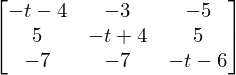

In [9]:
from sympy.abc import t
A = sympy.Matrix([[-4-t, -3, -5], [5, 4-t, 5], [-7, -7, -6-t]])
A

In [10]:
A.det()

In [11]:
solve(A.det(), t)

2) Найдем собственные векторы для каждого собственного значения.

$A \overline{u_1} = \lambda_1 \overline{u_1} \iff$

$\iff \begin{pmatrix} -4 - (-6) & -3 & -5 \\ 5 & 4 - (-6) & 5 \\ -7 & -7 & -6 - (-6) \end{pmatrix} * \begin{pmatrix} x_1 \\ y_1 \\ z_1 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 0 \end{pmatrix} $

$\iff \begin{pmatrix} 2 & -3 & -5 \\ 5 & 10 & 5 \\ -7 & -7 & 0 \end{pmatrix} * \begin{pmatrix} x_1 \\ y_1 \\ z_1 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 0 \end{pmatrix} $

Выполним тождественные преобразования.

$\iff \begin{pmatrix} 7 & 7 & 0 \\ 5 & 10 & 5 \\ -7 & -7 & 0 \end{pmatrix} * \begin{pmatrix} x_1 \\ y_1 \\ z_1 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 0 \end{pmatrix} $ 

$\iff \begin{pmatrix} 1 & 1 & 0 \\ 1 & 2 & 1 \end{pmatrix} * \begin{pmatrix} x_1 \\ y_1 \\ z_1 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \end{pmatrix} $ 

$\iff \begin{pmatrix} 1 & 1 & 0 \\ 0 & 1 & 1 \end{pmatrix} * \begin{pmatrix} x_1 \\ y_1 \\ z_1 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \end{pmatrix} $ 

$x_1 + y_1 = 0 \ \& \ y_1 + z_1 = 0 \iff x_1 = - y_1= z_1$ 

Выберем произвольное значение $x_1 = 1$. 

Тогда собственный вектор для $\lambda_1 = - 6$ будет иметь вид: $\overline{u_1} = (1; -1; 1)  $

$A \overline{u_2} = \lambda_2 \overline{u_2} \iff$

$\iff \begin{pmatrix} -4 - (-1) & -3 & -5 \\ 5 & 4 - (-1) & 5 \\ -7 & -7 & -6 - (-1) \end{pmatrix} * \begin{pmatrix} x_2 \\ y_2 \\ z_2 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 0 \end{pmatrix} $

$\iff \begin{pmatrix} -3 & -3 & -5 \\ 5 & 5 & 5 \\ -7 & -7 & -5 \end{pmatrix} * \begin{pmatrix} x_2 \\ y_2 \\ z_2 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 0 \end{pmatrix} $

Выполним тождественные преобразования.

$\iff \begin{pmatrix} 2 & 2 & 0 \\ 5 & 5 & 5 \\ -2 & -2 & 0 \end{pmatrix} * \begin{pmatrix} x_2 \\ y_2 \\ z_2 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 0 \end{pmatrix} $ 

$\iff \begin{pmatrix} 1 & 1 & 0 \\ 1 & 1 & 1 \end{pmatrix} * \begin{pmatrix} x_2 \\ y_2 \\ z_2 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \end{pmatrix} $ 

$\iff \begin{pmatrix} 1 & 1 & 0 \\ 0 & 0 & 1 \end{pmatrix} * \begin{pmatrix} x_2 \\ y_2 \\ z_2 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \end{pmatrix} $ 

$x_2 + y_2 = 0 \ \& \ z_2 = 0 \iff x_2 = - y_2 \ \& \ z_2 = 0$ 

Выберем произвольное значение $y_2 = 1$. 

Тогда собственный вектор для $\lambda_2 = - 1$ будет иметь вид: $\overline{u_2} = (-1; 1; 0)  $

$A \overline{u_3} = \lambda_3 \overline{u_3} \iff$

$\iff \begin{pmatrix} -4 - 1 & -3 & -5 \\ 5 & 4 - 1& 5 \\ -7 & -7 & -6 - 1 \end{pmatrix} * \begin{pmatrix} x_3 \\ y_3 \\ z_3 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 0 \end{pmatrix} $

$\iff \begin{pmatrix} -5 & -3 & -5 \\ 5 & 3 & 5 \\ -7 & -7 & -7 \end{pmatrix} * \begin{pmatrix} x_3 \\ y_3 \\ z_3 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 0 \end{pmatrix} $

Выполним тождественные преобразования.

$\iff \begin{pmatrix} 5 & 3 & 5 \\1 & 1 & 1 \end{pmatrix} * \begin{pmatrix} x_3 \\ y_3 \\ z_3 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 0 \end{pmatrix} $ 

$\iff \begin{pmatrix} 0 & -2 & 0 \\ 1 & 1 & 1 \end{pmatrix} * \begin{pmatrix} x_3 \\ y_3 \\ z_3 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \end{pmatrix} $ 

$\iff \begin{pmatrix} 0 & 1 & 0 \\ 1 & 1 & 1 \end{pmatrix} * \begin{pmatrix} x_3 \\ y_3 \\ z_3 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \end{pmatrix} $ 

$\iff \begin{pmatrix} 0 & 1 & 0 \\ 1 & 0 & 1 \end{pmatrix} * \begin{pmatrix} x_3 \\ y_3 \\ z_3 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \end{pmatrix} $ 

$x_3 + z_3 = 0 \ \& \ y_3 = 0 \iff x_3 = - z_3 \ \& \ y_3 = 0$ 

Выберем произвольное значение $z_3 = 1$. 

Тогда собственный вектор для $\lambda_3 = 1$ будет иметь вид: $\overline{u_3} = (-1; 0; 1)  $

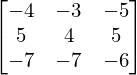

In [12]:
A = sympy.Matrix([[-4, -3, -5], [5, 4, 5], [-7, -7, -6]])
A

In [13]:
A.eigenvals()

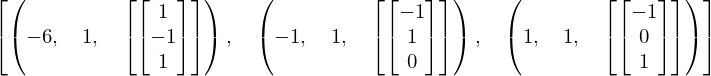

In [14]:
A.eigenvects()